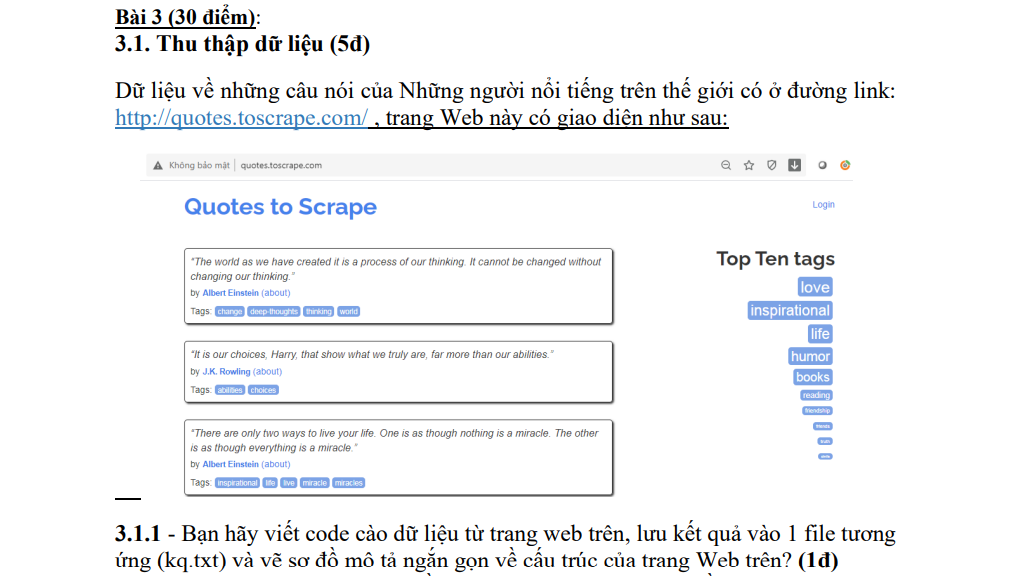

In [88]:
import requests
from bs4 import BeautifulSoup

base_url = "http://quotes.toscrape.com/"
url = base_url
count = 0
with open('kq.txt', 'w', encoding='utf-8') as f:
    while url and count < 40:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        quotes = soup.find_all('div', class_='quote')

        for quote in quotes:
            if count >= 40:
                break
            text = quote.find('span', class_='text').text
            author = quote.find('small', class_='author').text
            f.write(f'{text} - {author}\n')
            count += 1

        next_page = soup.find('li', class_='next')
        url = base_url + next_page.find('a')['href'] if next_page else None

print("Hoàn thành cào dữ liệu!")


Hoàn thành cào dữ liệu!


##### Mô tả ngắn gọn về cấu trúc trang web

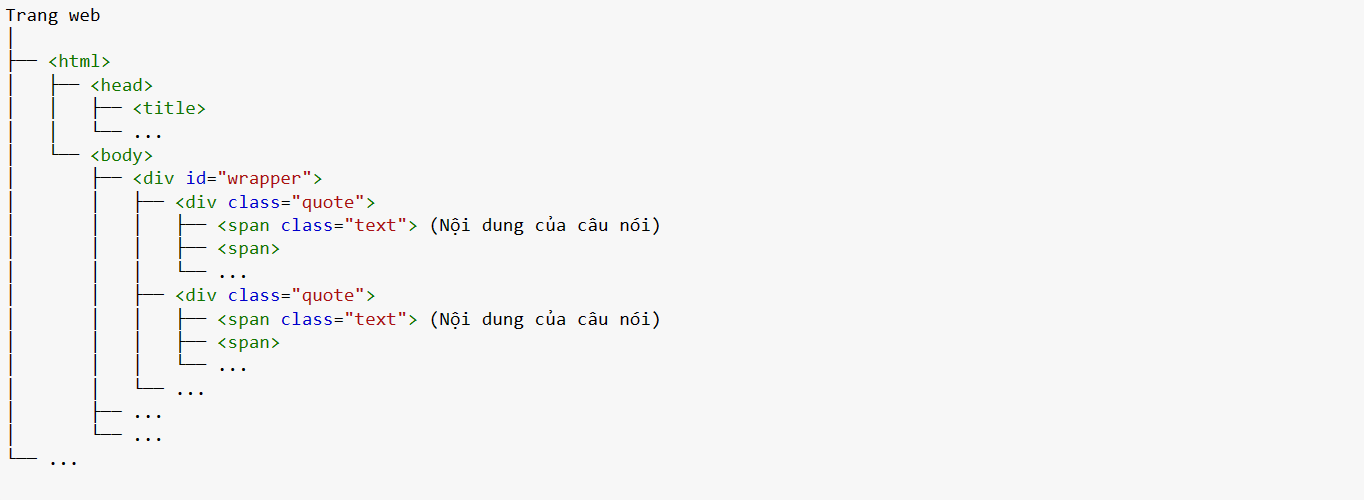

##### 3.1.2 
Với dữ liệu bạn vừa cào về, bạn hãy thực hiện các yêu cầu sau:  
- a. Hãy đọc tất cả các thẻ html (div) với lớp là "quote" và lưu nó trong biến 'result’,  
hiển thị giá trị biến 'result’ ra màn hình? (1đ)  

In [89]:
import requests
from bs4 import BeautifulSoup

url = "http://quotes.toscrape.com/"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

result = soup.find_all('div', class_='quote')

for quote in result:
    print(quote)


<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="tag" href="/tag/change/page/1/">change</a>
<a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
<a class="tag" href="/tag/thinking/page/1/">thinking</a>
<a class="tag" href="/tag/world/page/1/">world</a>
</div>
</div>
<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>
<span>by <small class="author" itemprop="author">J.K. R

- b. Hãy tìm trong biến 'result’ vừa rồi các dữ liệu có chứa nhãn "small" với class
là "author" và in kết quả ra màn hình? (1đ)

In [90]:
for quote in result:
    author = quote.find('small', class_='author')
    print(author)


<small class="author" itemprop="author">Albert Einstein</small>
<small class="author" itemprop="author">J.K. Rowling</small>
<small class="author" itemprop="author">Albert Einstein</small>
<small class="author" itemprop="author">Jane Austen</small>
<small class="author" itemprop="author">Marilyn Monroe</small>
<small class="author" itemprop="author">Albert Einstein</small>
<small class="author" itemprop="author">André Gide</small>
<small class="author" itemprop="author">Thomas A. Edison</small>
<small class="author" itemprop="author">Eleanor Roosevelt</small>
<small class="author" itemprop="author">Steve Martin</small>


- c. Hãy viết hàm tacgiaLink() để lấy nội dung của mỗi tác giả. Với mỗi tác giả in
ra màn hình các nội dung (1đ)  
✓ Tên tác giả  
✓ Đường link của tác giả  
✓ Ngày tháng năm sinh  
✓ Và câu nói nổi tiếng của tác giả  

In [91]:
import requests
from bs4 import BeautifulSoup
import csv

def tacgiaLink():
    base_url = "http://quotes.toscrape.com/"
    url = base_url
    data = []
    count = 0
    while url and count < 40:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        quotes = soup.find_all('div', class_='quote')

        for quote in quotes:
            if count >= 40:
                break
            author_name = quote.find('small', class_='author').text
            author_link = base_url + quote.find('a')['href']
            author_response = requests.get(author_link)
            author_soup = BeautifulSoup(author_response.text, 'html.parser')
            author_birthday = author_soup.find('span', class_='author-born-date').text
            famous_quote = quote.find('span', class_='text').text
            data.append([author_name, author_link, author_birthday, famous_quote])
            count += 1

        next_page = soup.find('li', class_='next')
        url = base_url + next_page.find('a')['href'] if next_page else None
    return data

data = tacgiaLink()


- d. Hãy lưu kết quả ở câu c vào file Quote.csv tương ứng, với mỗi tác giả là 1  
dòng dữ liệu. Bạn được yêu cầu thu thập ít nhất 40 câu nói nổi tiếng từ trang  
web trên một cách tự động theo code của các ý trên? (1đ)   

In [92]:
#thông báo lưu file thành công
with open('Quote.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(["Tên tác giả", "Đường link của tác giả", "Ngày tháng năm sinh", "Câu nói nổi tiếng của tác giả"])
    writer.writerows(data)
print("Lưu file thành công!")

Lưu file thành công!


In [93]:
import pandas as pd
docfile = pd.read_csv('Quote.csv')
docfile.head()

,Tên tác giả,Đường link của tác giả,Ngày tháng năm sinh,Câu nói nổi tiếng của tác giả
0,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,"March 14, 1879",“The world as we have created it is a process ...
1,J.K. Rowling,http://quotes.toscrape.com//author/J-K-Rowling,"July 31, 1965","“It is our choices, Harry, that show what we t..."
2,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,"March 14, 1879",“There are only two ways to live your life. On...
3,Jane Austen,http://quotes.toscrape.com//author/Jane-Austen,"December 16, 1775","“The person, be it gentleman or lady, who has ..."
4,Marilyn Monroe,http://quotes.toscrape.com//author/Marilyn-Monroe,"June 01, 1926","“Imperfection is beauty, madness is genius and..."


### 3.2. Khai phá dữ liệu (25 điểm)

###### 3.2.1. Xử lý dữ liệu- Data Imputation (2 điểm):
- Bạn hãy thêm vào Trường STT và điền tự động dữ liệu của trường này?
- Một số giá trị của dữ liệu Trường ngày sinh chưa có, bạn hãy đề xuất cách điền?
- Bạn hãy thêm vào Trường Tuoi (Tuổi) và đề xuất cách điền tuổi của các tác giả? 

----------------------------------------------------

- Điền dữ liệu cho trường ngày sinh: Nếu một số giá trị của trường ngày sinh chưa có, một cách tiếp cận phổ biến là sử dụng phương pháp imputation để điền vào các giá trị bị thiếu. Tuy nhiên, vì ngày sinh là thông tin cụ thể và không thể dự đoán một cách chính xác, nên một cách tiếp cận phù hợp có thể là để giá trị này trống hoặc điền một giá trị mặc định như ‘Không rõ’.
- Thêm trường Tuổi và điền tuổi của các tác giả: Để thêm trường Tuổi, bạn cần biết năm hiện tại và năm sinh của tác giả. Tuy nhiên, vì dữ liệu này được thu thập từ trang web và không cung cấp thông tin về năm mất (nếu có) của tác giả, việc tính toán tuổi có thể không chính xác. Dưới đây là một cách để thêm trường Tuổi vào dữ liệu của bạn:

In [94]:
import requests
from bs4 import BeautifulSoup
import csv
from datetime import datetime

def tacgiaLink():
    base_url = "http://quotes.toscrape.com/"
    url = base_url
    data = []
    stt = 1
    count = 0
    current_year = datetime.now().year
    while url and count < 40:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        quotes = soup.find_all('div', class_='quote')

        for quote in quotes:
            if count >= 40:
                break
            author_name = quote.find('small', class_='author').text
            author_link = base_url + quote.find('a')['href']
            author_response = requests.get(author_link)
            author_soup = BeautifulSoup(author_response.text, 'html.parser')
            author_birthday = author_soup.find('span', class_='author-born-date').text
            birth_year = int(author_birthday.split()[-1])
            age = current_year - birth_year
            famous_quote = quote.find('span', class_='text').text
            data.append([stt, author_name, author_link, author_birthday, famous_quote, age])
            stt += 1
            count += 1

        next_page = soup.find('li', class_='next')
        url = base_url + next_page.find('a')['href'] if next_page else None
    return data

data = tacgiaLink()

with open('Quote.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(["STT", "Tên tác giả", "Đường link của tác giả", "Ngày tháng năm sinh", "Câu nói nổi tiếng của tác giả", "Tuổi"])
    writer.writerows(data)


In [95]:
docfile = pd.read_csv('Quote.csv')
docfile.head()

,STT,Tên tác giả,Đường link của tác giả,Ngày tháng năm sinh,Câu nói nổi tiếng của tác giả,Tuổi
0,1,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,"March 14, 1879",“The world as we have created it is a process ...,145
1,2,J.K. Rowling,http://quotes.toscrape.com//author/J-K-Rowling,"July 31, 1965","“It is our choices, Harry, that show what we t...",59
2,3,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,"March 14, 1879",“There are only two ways to live your life. On...,145
3,4,Jane Austen,http://quotes.toscrape.com//author/Jane-Austen,"December 16, 1775","“The person, be it gentleman or lady, who has ...",249
4,5,Marilyn Monroe,http://quotes.toscrape.com//author/Marilyn-Monroe,"June 01, 1926","“Imperfection is beauty, madness is genius and...",98


##### 3.2.2. Khám phá dữ liệu- Data Exploration (10 điểm):
Bạn cần khám phá dữ liệu để hiển thị một số thông tin thống kê và phân tích của tập
dữ liệu đã cho. Chẳng hạn như:
- Thống kê về tác giả và câu nói nổi tiếng có trong bộ dữ liệu,
- Thống kê về năm sinh và độ tuổi của các tác giả,
- Thống kê về các câu nói nổi tiếng như: câu dài nhất, ngắn nhất, số từ, …
- Thống kê về các từ được sử dụng trong các câu nói,
- Phân tích, trực quan mối quan hệ giữa giữa tác giả và câu nói nổi tiếng,
- Phân tích, trực quan mối quan hệ giữa các tác giả với nhau,…

In [77]:
#Thống kê về tác giả và câu nói nổi tiếng có trong bộ dữ liệu,
import pandas as pd

# Đọc dữ liệu từ file CSV
data = pd.read_csv('Quote.csv')

# Thống kê số lượng tác giả duy nhất
unique_authors = data['Tên tác giả'].nunique()
print(f'Số lượng tác giả duy nhất: {unique_authors}')

# Thống kê số lượng câu nói nổi tiếng duy nhất
unique_quotes = data['Câu nói nổi tiếng của tác giả'].nunique()
print(f'Số lượng câu nói nổi tiếng duy nhất: {unique_quotes}')

# Thống kê số lượng câu nói nổi tiếng trung bình mỗi tác giả
avg_quotes_per_author = data.groupby('Tên tác giả')['Câu nói nổi tiếng của tác giả'].count().mean()
print(f'Số lượng câu nói nổi tiếng trung bình mỗi tác giả: {avg_quotes_per_author}')


Số lượng tác giả duy nhất: 24
Số lượng câu nói nổi tiếng duy nhất: 40
Số lượng câu nói nổi tiếng trung bình mỗi tác giả: 1.6666666666666667


In [78]:
#Thống kê về năm sinh và độ tuổi của các tác giả,

# Chuyển đổi trường 'Ngày tháng năm sinh' thành định dạng datetime
data['Ngày tháng năm sinh'] = pd.to_datetime(data['Ngày tháng năm sinh'], errors='coerce')

# Tạo trường 'Năm sinh' dựa trên trường 'Ngày tháng năm sinh'
data['Năm sinh'] = data['Ngày tháng năm sinh'].dt.year

# Thống kê về năm sinh
print('Thống kê về năm sinh:')
print(data['Năm sinh'].describe())

# Thống kê về độ tuổi
print('\nThống kê về độ tuổi:')
print(data['Tuổi'].describe())


Thống kê về năm sinh:
count      40.000000
mean     1903.700000
std        46.876926
min      1775.000000
25%      1879.000000
50%      1904.000000
75%      1945.000000
max      1965.000000
Name: Năm sinh, dtype: float64

Thống kê về độ tuổi:
count     40.000000
mean     120.300000
std       46.876926
min       59.000000
25%       79.000000
50%      120.000000
75%      145.000000
max      249.000000
Name: Tuổi, dtype: float64


In [79]:
#Thống kê về các câu nói nổi tiếng như: câu dài nhất, ngắn nhất, số từ, …



# Tạo trường 'Số từ' dựa trên trường 'Câu nói nổi tiếng của tác giả'
data['Số từ'] = data['Câu nói nổi tiếng của tác giả'].apply(lambda x: len(x.split()))

# Tìm câu dài nhất
longest_quote = data['Câu nói nổi tiếng của tác giả'].str.len().idxmax()
print('Câu dài nhất:')
print(data.loc[longest_quote, 'Câu nói nổi tiếng của tác giả'])

# Tìm câu ngắn nhất
shortest_quote = data['Câu nói nổi tiếng của tác giả'].str.len().idxmin()
print('\nCâu ngắn nhất:')
print(data.loc[shortest_quote, 'Câu nói nổi tiếng của tác giả'])

# Thống kê về số từ
print('\nThống kê về số từ:')
print(data['Số từ'].describe())


Câu dài nhất:
“This life is what you make it. No matter what, you're going to mess up sometimes, it's a universal truth. But the good part is you get to decide how you're going to mess it up. Girls will be your friends - they'll act like it anyway. But just remember, some come, some go. The ones that stay with you through everything - they're your true best friends. Don't let go of them. Also remember, sisters make the best friends in the world. As for lovers, well, they'll come and go too. And baby, I hate to say it, most of them - actually pretty much all of them are going to break your heart, but you can't give up because if you give up, you'll never find your soulmate. You'll never find that half who makes you whole and that goes for everything. Just because you fail once, doesn't mean you're gonna fail at everything. Keep trying, hold on, and always, always, always believe in yourself, because if you don't, then who will, sweetie? So keep your head high, keep your chin up, and mos

In [80]:
#Thống kê về các từ được sử dụng trong các câu nói,
from collections import Counter
import re



# Tạo một Counter để đếm số lần xuất hiện của mỗi từ
word_counter = Counter()

# Duyệt qua tất cả các câu nói
for quote in data['Câu nói nổi tiếng của tác giả']:
    # Loại bỏ dấu câu và chuyển tất cả các từ về dạng chữ thường
    words = re.findall(r'\b\w+\b', quote.lower())
    word_counter.update(words)

# In ra số lần xuất hiện của mỗi từ
for word, count in word_counter.most_common():
    print(f'{word}: {count}')


you: 61
is: 37
to: 34
it: 28
the: 27
a: 26
of: 22
not: 19
that: 17
and: 17
be: 16
i: 16
but: 14
t: 13
she: 12
your: 11
in: 11
s: 11
can: 11
her: 11
up: 9
love: 9
have: 8
what: 8
are: 8
more: 8
if: 8
or: 7
know: 7
will: 7
don: 7
them: 7
as: 6
we: 6
our: 6
than: 6
life: 6
for: 6
give: 6
so: 6
may: 6
when: 6
without: 5
there: 5
who: 5
good: 5
just: 5
never: 5
make: 5
no: 5
re: 5
friends: 5
ll: 5
go: 5
because: 5
everything: 4
like: 4
this: 4
going: 4
all: 4
makes: 4
keep: 4
always: 4
great: 4
opposite: 4
indifference: 4
read: 4
thinking: 3
live: 3
one: 3
other: 3
how: 3
get: 3
they: 3
well: 3
most: 3
much: 3
find: 3
fail: 3
at: 3
about: 3
think: 3
hurt: 3
where: 3
from: 3
do: 3
time: 3
things: 3
world: 2
harry: 2
only: 2
two: 2
ways: 2
though: 2
miracle: 2
must: 2
stupid: 2
beauty: 2
better: 2
absolutely: 2
become: 2
man: 2
loved: 2
day: 2
mess: 2
truth: 2
part: 2
remember: 2
some: 2
come: 2
ones: 2
with: 2
true: 2
best: 2
let: 2
also: 2
too: 2
hate: 2
break: 2
heart: 2
doesn: 2
mean: 2
h

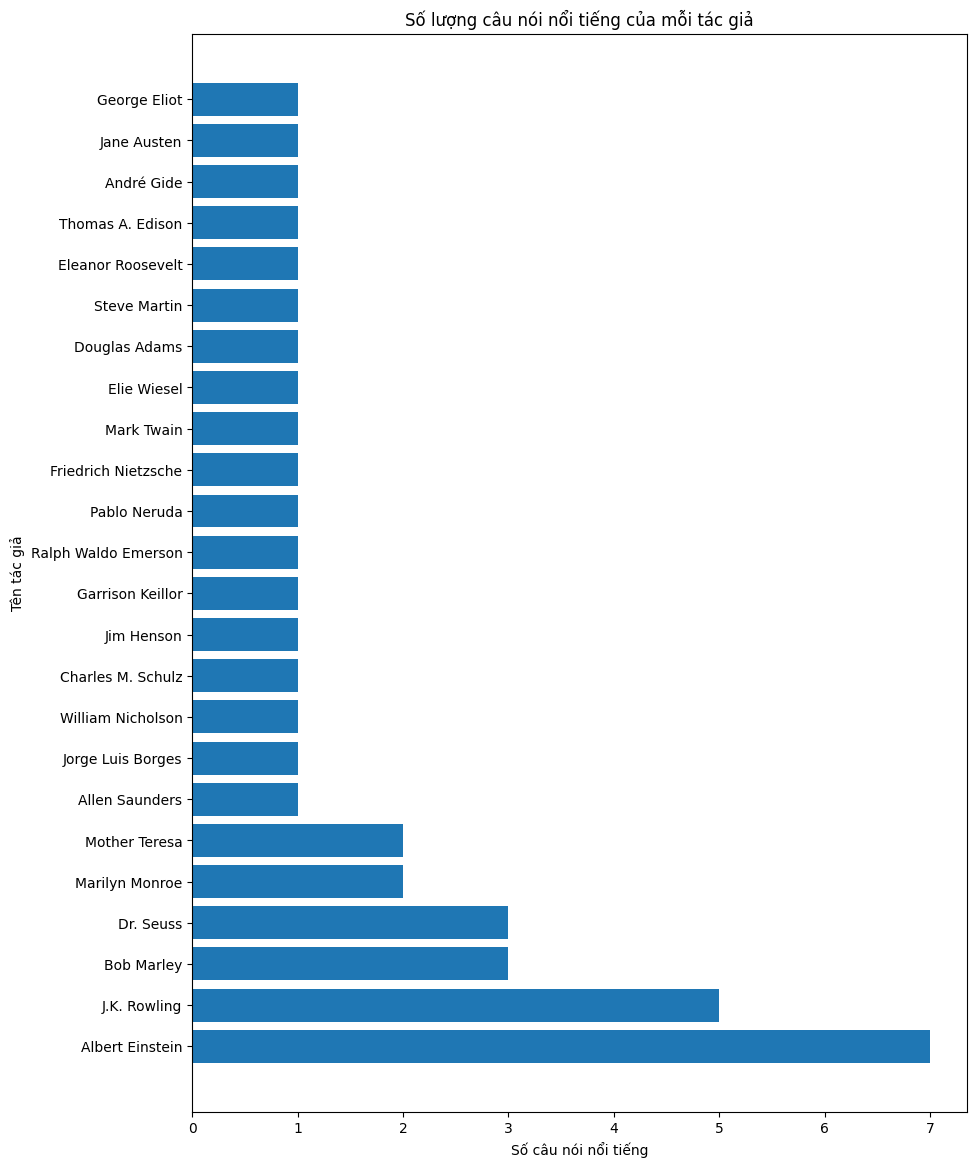

In [81]:
#Phân tích, trực quan mối quan hệ giữa giữa tác giả và câu nói nổi tiếng
import pandas as pd
import matplotlib.pyplot as plt



# Tạo một DataFrame mới chứa số lượng câu nói nổi tiếng của mỗi tác giả
author_quote_counts = data['Tên tác giả'].value_counts().reset_index()
author_quote_counts.columns = ['Tên tác giả', 'Số câu nói nổi tiếng']

# Vẽ biểu đồ cột để trực quan hóa số lượng câu nói nổi tiếng của mỗi tác giả
plt.figure(figsize=(10, 14))
plt.barh(author_quote_counts['Tên tác giả'], author_quote_counts['Số câu nói nổi tiếng'])
plt.xlabel('Số câu nói nổi tiếng')
plt.ylabel('Tên tác giả')
plt.title('Số lượng câu nói nổi tiếng của mỗi tác giả')
plt.show()


##### 3.2.3. Trích xuất đặc trưng- Feature Extraction (3 điểm):  
Hãy đề xuất cách trích xuất đặc trưng từ bộ dữ liệu đã cho, cung cấp lý do và giải  
thích cách làm của bạn.  

- Tên tác giả: Tên tác giả có thể được mã hóa thành dạng số để sử dụng trong mô hình học máy. Một phương pháp phổ biến là sử dụng mã hóa one-hot, tạo ra một vectơ với độ dài bằng số lượng tác giả duy nhất và chỉ có một giá trị là 1 tại vị trí tương ứng với tác giả đó.
- Ngày tháng năm sinh: Có thể tạo ra các đặc trưng mới như “Tháng sinh”, “Ngày sinh” và “Năm sinh”. Ngoài ra, có thể tính toán “Tuổi” dựa trên “Năm sinh” nếu dữ liệu được cập nhật liên tục.
- Câu nói nổi tiếng của tác giả: Có thể sử dụng các phương pháp xử lý ngôn ngữ tự nhiên (NLP) để trích xuất đặc trưng từ văn bản. Ví dụ, TF-IDF (Term Frequency-Inverse Document Frequency) để đánh giá tầm quan trọng của một từ trong câu nói hoặc Word2Vec để biểu diễn từ dưới dạng vectơ số.
- Tuổi: Đây là một đặc trưng số và có thể được sử dụng trực tiếp trong mô hình học máy.

In [82]:
import csv
from sklearn.feature_extraction.text import TfidfVectorizer

# Đọc dữ liệu từ file CSV
with open('Quote.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    next(reader)  # Bỏ qua hàng tiêu đề
    data = list(reader)

# Trích xuất số lượng từ trong mỗi câu nói
quote_lengths = [len(quote.split()) for _, _, _, _, quote, _ in data]

# Trích xuất từ khóa sử dụng TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([quote for _, _, _, _, quote, _ in data])
tfidf_feature_names = vectorizer.get_feature_names_out()

# In ra số lượng từ và từ khóa cho mỗi câu nói
for i, quote in enumerate(data):
    print(f"Câu nói: {quote[4]}")
    print(f"Số lượng từ: {quote_lengths[i]}")
    print(f"Từ khóa: {tfidf_feature_names[tfidf_matrix[i].argmax()]}\n")


Câu nói: “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
Số lượng từ: 21
Từ khóa: thinking

Câu nói: “It is our choices, Harry, that show what we truly are, far more than our abilities.”
Số lượng từ: 16
Từ khóa: our

Câu nói: “There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
Số lượng từ: 26
Từ khóa: miracle

Câu nói: “The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
Số lượng từ: 19
Từ khóa: be

Câu nói: “Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
Số lượng từ: 16
Từ khóa: absolutely

Câu nói: “Try not to become a man of success. Rather become a man of value.”
Số lượng từ: 14
Từ khóa: become

Câu nói: “It is better to be hated for what you are than to be loved for what you are not.”
Số lượng từ: 19
Từ khóa: for

Câu nói

In [83]:
import re
from collections import Counter

def create_vocabulary(texts):
  """
  Tạo từ điển từ một danh sách các văn bản.

  Args:
    texts: Danh sách các văn bản.

  Returns:
    Từ điển với key là từ và value là chỉ số duy nhất.
  """
  vocabulary = set()
  for text in texts:
    words = re.findall(r'\w+', text.lower())
    vocabulary.update(words)
  word_to_index = {word: index for index, word in enumerate(vocabulary)}
  return word_to_index

def create_bow_vector(text, vocabulary):
  """
  Tạo vector BoW cho một văn bản.

  Args:
    text: Văn bản.
    vocabulary: Từ điển.

  Returns:
    Vector BoW.
  """
  words = re.findall(r'\w+', text.lower())
  word_counts = Counter(words)
  bow_vector = [word_counts.get(word, 0) for word in vocabulary]
  return bow_vector

# Đọc dữ liệu từ file
with open('Quote.csv', 'r', encoding='utf-8') as f:
  lines = f.readlines()

# Loại bỏ header
data = lines[1:]

# Tách dữ liệu thành câu nói, tác giả và vector BoW
quotes = [line.split(',', 5)[4] for line in data]
authors = [line.split(',', 5)[1] for line in data]

# Tạo từ điển từ danh sách các câu nói
vocabulary = create_vocabulary(quotes)

# Tạo vector BoW cho mỗi câu nói
bow_vectors = [create_bow_vector(quote, vocabulary) for quote in quotes]

# In ra 40 câu nói, tác giả và vector BoW tương ứng
for quote, author, bow_vector in zip(quotes[:40], authors[:40], bow_vectors[:40]):
    print(f"Tác giả: {author}")
    print(f"Vector BoW: {bow_vector}")
    print("---")


Tác giả: Albert Einstein
Vector BoW: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
---
Tác giả: J.K. Rowling
Vector BoW: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---
Tác giả: Albert Einstein
Vector BoW: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
---
Tác giả: Jane Austen
Vector BoW: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---
Tác giả: Marilyn Monroe
Vector BoW: [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---
Tác giả: Albert Einstein
Vector BoW: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
---
Tác giả: André Gide
Vector BoW: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
---
Tác giả: Thomas A. Edison
Vector BoW: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---
Tác giả: Eleanor Roosevelt
Vector BoW: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---
Tác giả: Steve Martin
Vector BoW: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [84]:
docfile = pd.read_csv('Quote.csv')
docfile.head()

,STT,Tên tác giả,Đường link của tác giả,Ngày tháng năm sinh,Câu nói nổi tiếng của tác giả,Tuổi
0,1,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,"March 14, 1879",“The world as we have created it is a process ...,145
1,2,J.K. Rowling,http://quotes.toscrape.com//author/J-K-Rowling,"July 31, 1965","“It is our choices, Harry, that show what we t...",59
2,3,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,"March 14, 1879",“There are only two ways to live your life. On...,145
3,4,Jane Austen,http://quotes.toscrape.com//author/Jane-Austen,"December 16, 1775","“The person, be it gentleman or lady, who has ...",249
4,5,Marilyn Monroe,http://quotes.toscrape.com//author/Marilyn-Monroe,"June 01, 1926","“Imperfection is beauty, madness is genius and...",98


#### 3.2.4. Suy luận (10 điểm):    
Bạn được yêu cầu phân loại câu nói theo tên người nổi tiếng và tính độ tương đồng  
phong cách nói giữa các tác giả theo 2 yêu cầu sau:  
- Hãy dự đoán tên của người nổi tiếng theo câu nói dựa trên các đặc trưng bạn trích  
xuất ở trên và đánh giá trên bộ dữ liệu đã cho với tỉ lệ Train/Test và các độ đo phù  
hợp? (5 điểm)   
- Hãy đề xuất cách tính độ tương đồng phong cách nói giữa các tác giả và tìm ra các  
tác giả có phong cách nói tương đồng nhau nhất? (5 điểm)  

In [85]:
#Hãy dự đoán tên của người nổi tiếng theo câu nói dựa trên các đặc trưng bạn trích  
#xuất ở trên và đánh giá trên bộ dữ liệu đã cho với tỉ lệ Train/Test và các độ đo phù  
#hợp? (5 điểm) 

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

class Model:
    def __init__(self, model, name):
        self.model = model
        self.name = name
        self.is_trained = False
        self.predicted = False
        self.ans = ""

    def fit(self, Xtrain, Xtest, ytrain, ytest):
        self.model.fit(Xtrain, ytrain)
        ypredict = self.model.predict(Xtest)
        self.acc = accuracy_score(ytest, ypredict)
        self.f1_score = f1_score(ytest, ypredict, average='macro')
        self.is_trained = True
        return self.ans

    def Prediction(self, your_predict):
        self.predicted = True
        return self.model.predict(your_predict)

    def __repr__(self):
        if self.is_trained:
            return f'{self.name} has Accuracy Score: {round(self.acc, 4)} \n {self.name} has F1 score: {round(self.f1_score, 4)}'
        return f'{self.name} is not trained yet'

data = pd.read_csv('Quote.csv')
x, y = data['Câu nói nổi tiếng của tác giả'].values, data['Tên tác giả'].values

# Tiền xử lý dữ liệu (chuyển văn bản thành vector đặc trưng): Sử dụng TfidfVectorizer
vectorizer = TfidfVectorizer(
    lowercase=True,
    strip_accents='unicode',
    stop_words='english'
)
x = vectorizer.fit_transform(x)

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Huấn luyện mô hình phân loại và đánh giá bằng các độ đo phù hợp
models = [
    Model(MultinomialNB(), 'Multinomial Naive Bayes'),
    Model(LinearSVC(dual='auto'), 'Linear Support Vector Machine'),
    Model(RandomForestClassifier(), 'Random Forest Classifier'),
    Model(LogisticRegression(), 'Logistic Regression')
]

for model in models:
    model.fit(X_train, X_test, y_train, y_test)

# Dự đoán tên của người nổi tiếng dựa trên câu nói
quote = x[1]
for model in models:
    print(model.Prediction(quote))

print(f'Tacgia: {y[1]}')

['J.K. Rowling']
['J.K. Rowling']
['J.K. Rowling']
['J.K. Rowling']
Tacgia: J.K. Rowling


In [86]:
##Hãy đề xuất cách tính độ tương đồng phong cách nói giữa các tác giả và tìm ra các  
##tác giả có phong cách nói tương đồng nhau nhất? (5 điểm) 

import re
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import cosine

# Đọc dữ liệu từ file
with open('Quote.csv', 'r', encoding='utf-8') as f:
  lines = f.readlines()

# Loại bỏ header
data = lines[1:]

# Tách dữ liệu thành câu nói, tác giả và vector BoW
quotes = [line.split(',', 5)[4] for line in data]
authors = [line.split(',', 5)[1] for line in data]
bow_vectors = [create_bow_vector(quote, vocabulary) for quote in quotes]

# Tạo vector TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectors = tfidf_vectorizer.fit_transform(quotes)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectors, authors, test_size=0.2)

# Huấn luyện mô hình Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# Dự đoán tên người nổi tiếng theo câu nói
y_pred = model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác: {accuracy}")

# Tính độ tương đồng phong cách nói giữa các tác giả
author_similarities = {}
for author1 in authors:
  author_similarities[author1] = {}
  for author2 in authors:
    if author1 != author2:
      author_similarities[author1][author2] = 1 - cosine(tfidf_vectorizer.transform([quotes[authors.index(author1)]]).toarray()[0], tfidf_vectorizer.transform([quotes[authors.index(author2)]]).toarray()[0])

# In ra các tác giả có phong cách nói tương đồng nhất
for author1, similarities in author_similarities.items():
  sorted_similarities = sorted(similarities.items(), key=lambda item: item[1], reverse=True)
  print(f"Tác giả {author1} có phong cách nói tương đồng nhất với các tác giả sau:")
  for author2, similarity in sorted_similarities[:3]:
    print(f"- {author2}: {similarity}")

Độ chính xác: 0.5
Tác giả Albert Einstein có phong cách nói tương đồng nhất với các tác giả sau:
- J.K. Rowling: 0.0
- Jane Austen: 0.0
- Marilyn Monroe: 0.0
Tác giả J.K. Rowling có phong cách nói tương đồng nhất với các tác giả sau:
- Albert Einstein: 0.0
- Jane Austen: 0.0
- Marilyn Monroe: 0.0
Tác giả Jane Austen có phong cách nói tương đồng nhất với các tác giả sau:
- Albert Einstein: 0.0
- J.K. Rowling: 0.0
- Marilyn Monroe: 0.0
Tác giả Marilyn Monroe có phong cách nói tương đồng nhất với các tác giả sau:
- Albert Einstein: 0.0
- J.K. Rowling: 0.0
- Jane Austen: 0.0
Tác giả André Gide có phong cách nói tương đồng nhất với các tác giả sau:
- Albert Einstein: 0.0
- J.K. Rowling: 0.0
- Jane Austen: 0.0
Tác giả Thomas A. Edison có phong cách nói tương đồng nhất với các tác giả sau:
- Albert Einstein: 0.0
- J.K. Rowling: 0.0
- Jane Austen: 0.0
Tác giả Eleanor Roosevelt có phong cách nói tương đồng nhất với các tác giả sau:
- Albert Einstein: 0.0
- J.K. Rowling: 0.0
- Jane Austen: 0.0
T